In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette("hls", 10)

import pickle

from braindecode.experiments.load import load_exp_and_model
from braindecode.analysis.plot_util import plot_head_signals_tight,plot_head_signals

Using gpu device 0: GeForce GTX 780 (CNMeM is disabled, cuDNN 5005)
/home/hartmank/braindecode/vienv/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%cd '/home/hartmank/braindecode/convvisual'
import analysis
%cd '/home/hartmank/braindecode'

/home/hartmank/braindecode/convvisual
/home/hartmank/braindecode


In [3]:
exp, model = load_exp_and_model('data/models/paper/ours/cnt/deep4/243', set_invalid_to_NaN=False)

sensor_names = exp.dataset.test_set.sensor_names
sensor_names.remove('Cz')

sampling_rate = exp.dataset.train_set.signal_processor.cnt_preprocessors[1][1]['newfs']
step = 1./sampling_rate

INFO:braindecode.experiments.experiment:Setting n_sample preds automatically to 479
INFO:braindecode.experiments.experiment:Input window length is 522
INFO:braindecode.experiments.experiment:Setting n_sample preds automatically to 479
INFO:braindecode.experiments.experiment:Input window length is 522


In [4]:
f = open('/home/hartmank/data/convvisual/RF_data/models/paper/ours/cnt/deep4/243/100BestInputsFor20BestFilters_Class0_Layer28.data')
data28C0 = pickle.load(f)
f.close()
f = open('/home/hartmank/data/convvisual/RF_data/models/paper/ours/cnt/deep4/243/100BestInputsFor20BestFilters_Class1_Layer28.data')
data28C1 = pickle.load(f)
f.close()
f = open('/home/hartmank/data/convvisual/RF_data/models/paper/ours/cnt/deep4/243/100BestInputsFor20BestFilters_Class2_Layer28.data')
data28C2 = pickle.load(f)
f.close()
f = open('/home/hartmank/data/convvisual/RF_data/models/paper/ours/cnt/deep4/243/100BestInputsFor20BestFilters_Class3_Layer28.data')
data28C3 = pickle.load(f)
f.close()

In [16]:
X_RF = data28C0['RF']
X_RF_cropped = X_RF[np.isnan(X_RF)==False]
X_RF_cropped = X_RF_cropped.reshape((X_RF.shape[0],X_RF.shape[1],44,-1))
X_RF_cropped.shape

Input_baseline = data28C0['X']
Input_baseline = Input_baseline.transpose(0,2,1,3)
Input_baseline = Input_baseline.reshape((-1,Input_baseline.shape[2]))
print Input_baseline.shape,X_RF_cropped.shape
end_ind = (Input_baseline.shape[0]/X_RF_cropped.shape[3])*X_RF_cropped.shape[3]
Input_baseline = Input_baseline[:end_ind]
Input_baseline = Input_baseline.reshape((-1,X_RF_cropped.shape[3],Input_baseline.shape[1]))
Input_baseline = Input_baseline.transpose(0,2,1)
print Input_baseline.shape,X_RF_cropped.shape

(100000, 44) (4, 30, 44, 522)
(191, 44, 522) (4, 30, 44, 522)


In [17]:
means_base = list()
FFT_base = list()
for i in range(Input_baseline.shape[0]):
    FFT_,freqs,phase_ = analysis.get_frequency(Input_baseline[i],250)
    FFT_base.append(FFT_)
    means_base.append(analysis.get_offset(Input_baseline[i]))

means_base = np.asarray(means_base)
FFT_base = np.asarray(FFT_base)
print FFT_base.shape

(191, 44, 21)


In [18]:
means = list()
FFT = list()
for i in range(X_RF_cropped.shape[0]):
    means_tmp = list()
    FFT_tmp = list()
    for j in range(X_RF_cropped.shape[1]):
        FFT_,freqs,phase_ = analysis.get_frequency(X_RF_cropped[i,j],250)
        FFT_tmp.append(FFT_)
        means_tmp.append(analysis.get_offset(X_RF_cropped[i,j]))
    FFT.append(FFT_tmp)
    means.append(means_tmp)
        
means = np.asarray(means)
FFT = np.asarray(FFT)
print FFT[0].shape




(30, 44, 21)


In [19]:
(feat_means,feat_stds),b,names = analysis.feature_distributions([FFT[0],means[0]],['FFT','Mean'])
feat_stds = np.asarray(feat_stds)
feat_means = np.asarray(feat_means)

(feat_means_base,feat_stds_base),b,names = analysis.feature_distributions([FFT_base,means_base],['FFT','Mean'])
feat_stds_base = np.asarray(feat_stds_base)
feat_means_base = np.asarray(feat_means_base)

names = np.asarray(names)

Make sure this is tested!!
a (30, 44, 21)
a (30, 44)
Make sure this is tested!!
a (191, 44, 21)
a (191, 44)


In [35]:
feat_std_diff = np.divide(feat_stds,feat_stds_base)
feat_mean_diff = np.abs(np.divide(feat_means,feat_means_base))

In [36]:
print names[feat_mean_diff.argsort()[::-1]]

['Mean_15' 'Mean_9' 'Mean_3' 'Mean_2' 'Mean_6' 'Mean_29' 'Mean_35'
 'Mean_23' 'Mean_19' 'Mean_8' 'Mean_10' 'Mean_21' 'Mean_14' 'Mean_17'
 'Mean_34' 'Mean_7' 'Mean_41' 'Mean_13' 'Mean_20' 'Mean_27' 'Mean_40'
 'Mean_43' 'Mean_30' 'Mean_18' 'Mean_38' 'Mean_26' 'FFT_9_11' 'FFT_12_2'
 'FFT_9_5' 'FFT_1_2' 'FFT_2_9' 'FFT_6_2' 'FFT_5_2' 'FFT_16_11' 'FFT_22_2'
 'FFT_15_2' 'FFT_16_0' 'FFT_33_8' 'FFT_2_2' 'FFT_27_10' 'FFT_0_2'
 'FFT_1_10' 'FFT_4_9' 'FFT_10_0' 'FFT_30_5' 'FFT_20_10' 'FFT_36_6'
 'FFT_37_1' 'FFT_18_2' 'FFT_13_2' 'FFT_2_5' 'FFT_0_15' 'FFT_10_8'
 'FFT_15_5' 'FFT_1_9' 'FFT_19_9' 'FFT_3_2' 'FFT_16_5' 'FFT_3_9' 'FFT_1_15'
 'FFT_16_2' 'FFT_42_5' 'FFT_40_15' 'FFT_6_15' 'FFT_28_11' 'FFT_10_5'
 'FFT_23_2' 'FFT_15_0' 'FFT_10_2' 'FFT_19_2' 'FFT_41_15' 'FFT_5_5'
 'FFT_1_3' 'FFT_40_4' 'FFT_30_1' 'FFT_16_8' 'FFT_13_9' 'FFT_38_15'
 'FFT_8_10' 'FFT_9_9' 'FFT_17_2' 'FFT_13_15' 'FFT_31_15' 'FFT_25_8'
 'FFT_6_9' 'FFT_16_1' 'FFT_7_7' 'FFT_7_3' 'FFT_11_5' 'FFT_31_2' 'FFT_9_10'
 'FFT_37_2' 'FFT_24_6' 'FF

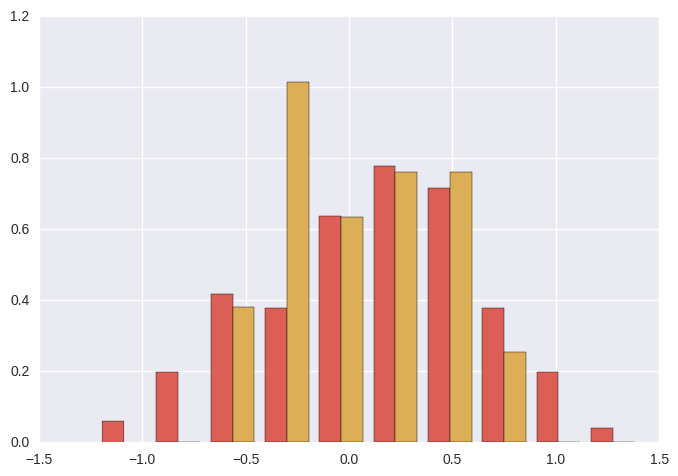

In [40]:
plt.hist([means_base[:,12],means[0][:,12]],normed=True)
plt.show()

(191, 44, 21)


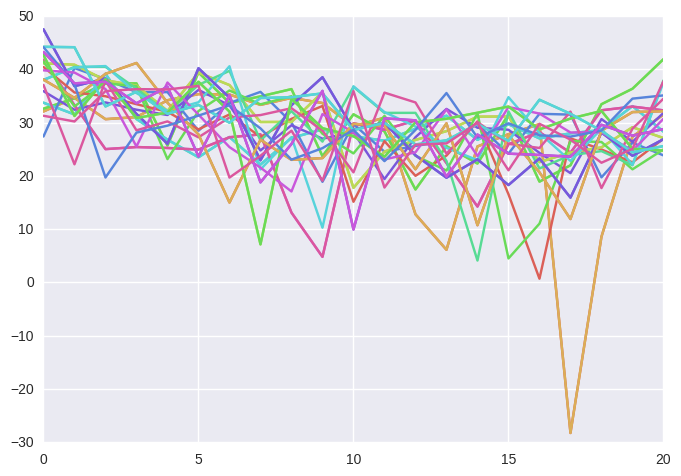

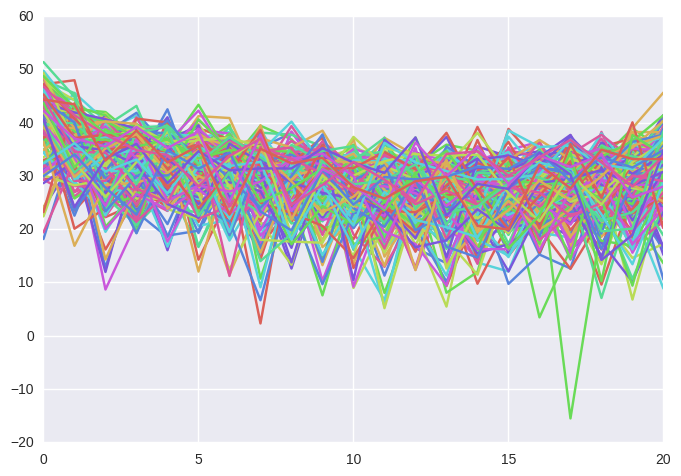

In [42]:
print FFT_base.shape
plt.plot(FFT[0][:,12].T)
plt.show()
plt.plot(FFT_base[:,12].T)
plt.show()

In [24]:
print names[feat_std_diff.argsort()]

['FFT_27_4' 'FFT_15_16' 'FFT_19_18' 'FFT_34_17' 'FFT_36_0' 'FFT_9_1'
 'FFT_13_18' 'FFT_22_2' 'FFT_43_0' 'FFT_22_14' 'FFT_25_18' 'FFT_30_16'
 'FFT_42_0' 'FFT_29_3' 'FFT_34_15' 'FFT_22_17' 'FFT_6_4' 'FFT_2_16'
 'FFT_9_16' 'FFT_4_4' 'FFT_24_4' 'FFT_15_2' 'FFT_26_18' 'FFT_33_0'
 'FFT_31_13' 'FFT_28_7' 'FFT_4_14' 'FFT_6_18' 'FFT_6_15' 'FFT_14_7'
 'FFT_5_2' 'FFT_30_14' 'FFT_2_1' 'FFT_4_7' 'FFT_29_14' 'FFT_35_3'
 'FFT_37_16' 'FFT_28_0' 'Mean_28' 'FFT_3_5' 'FFT_2_2' 'FFT_20_18'
 'FFT_36_6' 'FFT_1_6' 'FFT_22_18' 'FFT_31_15' 'FFT_7_1' 'FFT_8_16'
 'FFT_19_9' 'FFT_22_4' 'FFT_1_15' 'FFT_0_10' 'FFT_15_1' 'FFT_24_19'
 'FFT_24_3' 'FFT_9_2' 'FFT_30_1' 'FFT_8_8' 'FFT_20_4' 'FFT_0_7' 'FFT_13_13'
 'FFT_10_8' 'FFT_17_15' 'FFT_20_13' 'FFT_0_15' 'FFT_30_19' 'FFT_25_15'
 'FFT_13_15' 'FFT_6_10' 'FFT_5_6' 'FFT_12_11' 'FFT_18_19' 'FFT_34_0'
 'FFT_4_15' 'FFT_39_3' 'FFT_17_2' 'FFT_22_6' 'FFT_36_19' 'FFT_24_16'
 'FFT_1_10' 'FFT_25_13' 'FFT_17_18' 'FFT_39_4' 'FFT_19_15' 'FFT_4_3'
 'FFT_3_19' 'FFT_37_14' 'FFT_40_12' 

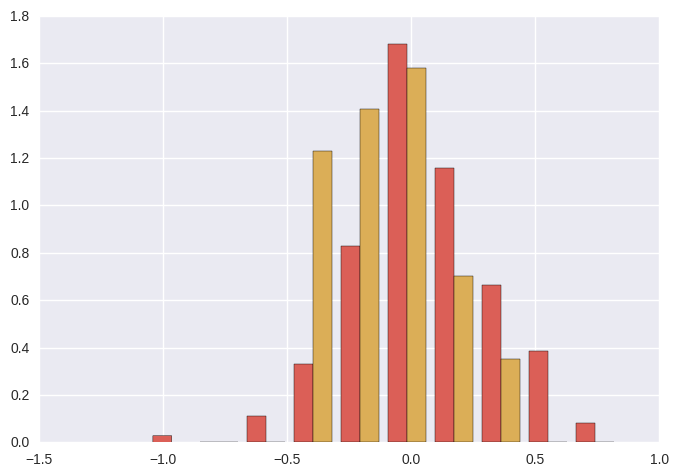

In [26]:
plt.hist([means_base[:,20],means[0][:,20]],normed=True)
plt.show()